In [1]:
import scipy
from scipy import optimize
import cvxopt
import matplotlib.pyplot as plt
import numpy as np
import sympy
sympy.init_printing()

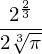

In [3]:
r,h = sympy.symbols("r,h")
Area = 2*sympy.pi*r**2 + 2*sympy.pi*r*h
Volume = sympy.pi*r**2*h
h_r = sympy.solve(Volume-1)[0]
Area_r = Area.subs(h_r)
rsol = sympy.solve(Area_r.diff(r))[0]    #diff求导
rsol

In [4]:
_.evalf()    #表示将前面的公式数据化，进行估算

In [5]:
def f(r):
    return 2*np.pi*r**2 + 2/r
r_min = optimize.brent(f,brack=(0.1,4))   #brack是一个区间
r_min

In [6]:
f(r_min)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


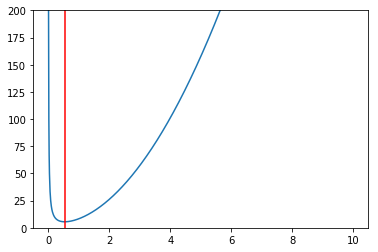

In [10]:
x=np.arange(0.0,10.0,0.01)    
y=f(x)
plt.plot(x,y)     #画图的命令
plt.axvline(r_min,color='red')    #plt.axvline将解标注出来
plt.ylim(0,200)    #控制纵坐标的范围

In [9]:
optimize.minimize_scalar(f,bracket=(0.1,4))

     fun: 5.5358104459320856
    nfev: 19
     nit: 15
 success: True
       x: 0.54192607725571351

In [12]:
beta = (0.25,0.75,0.5)
def f(x,b0,b1,b2):
    return b0 + b1*np.exp(-b2*x**2)
xdata = np. linspace(0,5,50)
y = f(xdata,*beta)
ydata = y + 0.05*np.random.randn(len(xdata))

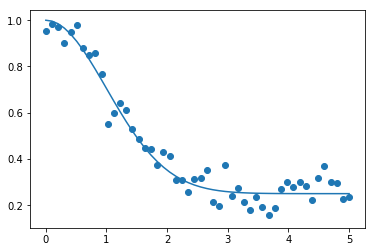

In [15]:
plt.scatter(xdata,ydata)   #scatter将数据以散点的形式显示出来
plt.plot(xdata,y)

In [16]:
def g(beta):
    return ydata - f(xdata,*beta)
beta_start=(1,1,1)
beta_opt,beta_cov=optimize.leastsq(g,beta_start)  #cov协方差矩阵
beta_opt

array([ 0.25609175,  0.73218217,  0.47873941])

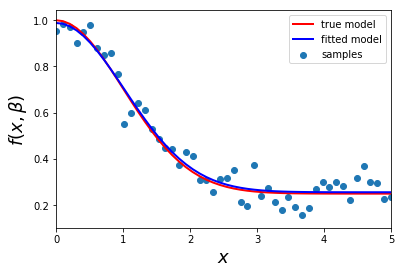

In [17]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata, label='samples')
ax.plot(xdata, y, 'r', lw=2, label='true model')
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2, label='fitted model')
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
ax.legend()